# 問題を作ろう！

In [1]:
%matplotlib inline
from sympy import *
init_printing()

## 001: 太郎くんの受験
太郎くんは合格可能性がそれぞれ$a\%$, $b\%$, $50\%$のA高校, B高校, C高校を受験する。この時、太郎くんが受ける全ての学校に合格する確率は$20\%$であった。しかし, C高校の願書を出し忘れてしまったためA高校とB高校のみの受験となり、その結果、今度は高校に行ける確率が$20\%$になってしまった。$a$, $b$の値を求めよ。

- - -

では、まず適当に値を考えて作ってみた、この問題を解いてみよう。
この場合、文字が2つなので、2つの式を立てれば良い。
一つ目の式は、合格可能性がそれぞれ$a\%$, $b\%$, $50\%$のA高校, B高校, C高校全てに合格する確率が20%なので、

In [2]:
a, b = symbols("a b")
eq1 = Eq((a/100)*(b/100)*Rational(50, 100), Rational(20, 100))
eq1

となる。

二つ目の式は、A高校とB高校のみ受験した場合、高校に行ける確率が20%になった、と言うことは、A高校に落ち、さらにB高校に落ちる確率が80%ということなので、

In [3]:
eq2 = Eq((1-(a/100))*(1-(b/100)), Rational(80, 100))
eq2

これを解くと、

In [4]:
solve([eq1, eq2])

あれれ。虚数解になっちゃった。。。。

In [5]:
del a, b, eq1, eq2 # お掃除

### 問題を作り直そう

てな訳で、問題を作り直さなきゃならないみたいです。まあでも、願書を出し忘れてしまったために全部受かる確率と高校に行ける確率が同じになってしまったと言うのは面白いから、この2つは同じ、と言う条件でいきましょう。ここでsympyの本領発揮、です。

まずは、問題文に出てくる数字を文字でおきます。

- - -

太郎くんは合格可能性がそれぞれ$a\%$, $b\%$, $p\%$のA高校, B高校, C高校を受験する。この時、太郎くんが受ける全ての学校に合格する確率は$q\%$であった。しかし, C高校の願書を出し忘れてしまったためA高校とB高校のみの受験となり、その結果、今度は高校に行ける確率が$q\%$になってしまった。$a$, $b$の値を求めよ。

- - -

次に、一つ条件を作りたいと思います。

* $a$, $b$, $p$, $q$は$0$より大きく、$100$より小さい数

この条件と、2つの等式で、解かせてみます。

In [6]:
a, b = symbols("a b")
p, q = symbols("p q")
eq1 = Eq((a/100)*(b/100)*(p/100), (q/100))
eq1

In [7]:
eq2 = Eq((1-(a/100))*(1-(b/100)), 1 - (q/100))
eq2

In [8]:
for i in range(1, 100): # forループでやってみよー
    st = ""
    eq3 = Eq(p, i)
    st += "p = " + str(i) + ": "
    sol1 = solve([eq1, eq2, eq3])
    sol2 = solve([0 < sol1[0][a], sol1[0][a] < 100])
    if sol2 == False:
        st += "False"
    else:
        st += str(sol2)
    
    print(st)

p = 1: False
p = 2: False
p = 3: False
p = 4: False
p = 5: False
p = 6: False
p = 7: False
p = 8: False
p = 9: False
p = 10: False
p = 11: False
p = 12: False
p = 13: False
p = 14: False
p = 15: False
p = 16: False
p = 17: False
p = 18: False
p = 19: False
p = 20: False
p = 21: False
p = 22: False
p = 23: False
p = 24: False
p = 25: False
p = 26: False
p = 27: False
p = 28: False
p = 29: False
p = 30: False
p = 31: False
p = 32: False
p = 33: False
p = 34: False
p = 35: False
p = 36: False
p = 37: False
p = 38: False
p = 39: False
p = 40: False
p = 41: False
p = 42: False
p = 43: False
p = 44: False
p = 45: False
p = 46: False
p = 47: False
p = 48: False
p = 49: False
p = 50: False
p = 51: False
p = 52: False
p = 53: False
p = 54: False
p = 55: False
p = 56: False
p = 57: False
p = 58: False
p = 59: False
p = 60: False
p = 61: False
p = 62: False
p = 63: False
p = 64: False
p = 65: False
p = 66: False
p = 67: False
p = 68: False
p = 69: False
p = 70: False
p = 71: False
p = 72: False
p

In [9]:
del a, b, eq1, eq2, eq3, st, sol1, sol2

あらら。ダメっぽい？
ちょっと問題文の方を変えて見ようか。

### 問題を作り直そう その2

諦めて文字を増やす。その代わりp,q,rは整数な!

- - -

太郎くんは合格可能性がそれぞれ$a\%$, $b\%$, $p\%$のA高校, B高校, C高校を受験する。この時、太郎くんが受ける全ての学校に合格する確率は$q\%$であった。しかし, C高校の願書を出し忘れてしまったためA高校とB高校のみの受験となり、その結果、今度は高校に行ける確率が$r\%$になってしまった。$a$, $b$の値を求めよ。

- - -

In [10]:
a, b = symbols("a b", real=True)
p, q, r = symbols("p q r", integer=True, real=True)
eq1 = Eq((a/100)*(b/100)*(p/100), (q/100))
eq1

In [11]:
eq2 = Eq((1-(a/100))*(1-(b/100)), 1 - (r/100))
eq2

あとはどんどん数を当てはめていって・・・・

In [12]:
eq3 = Eq(r, 20)
eq4 = Eq(p, 95)
eq5 = Eq(q, 1)

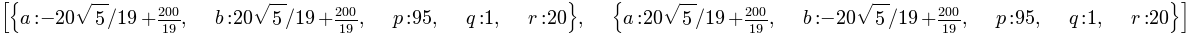

In [13]:
solve([eq1, eq2, eq3, eq4, eq5])

$r=20$, $p=95$, $q=1$となりました！

最終的な問題文：

- - -

太郎くんは合格可能性がそれぞれ$a\%$, $b\%$, $95\%$のA高校, B高校, C高校を受験する。この時、太郎くんが受ける全ての学校に合格する確率は$1\%$であった。しかし, C高校の願書を出し忘れてしまったためA高校とB高校のみの受験となり、その結果、高校に行ける確率が$20\%$になってしまった。$a$, $b$の値を求めよ。

- - -

答え：$(a=-\frac{20\sqrt{5}}{19}+\frac{200}{19}, b=\frac{20\sqrt{5}}{19}+\frac{200}{19}), (a=\frac{20\sqrt{5}}{19}+\frac{200}{19}, b=-\frac{20\sqrt{5}}{19}+\frac{200}{19})$

## 002: 闇の食塩水

coming soon!